In [2]:
df=pd.read_table("train.txt",delimiter=";",header=None,)

In [3]:
df.columns=['Text','Label']

In [4]:
df.head(5)

,Text,Label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


<strong style="font-size:1.3rem;font-family:arial;">We will classify the following emotions of the comments and they are sadness, anger,fear,joy</strong>

In [5]:
df['Label'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Label, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Label', ylabel='count'>

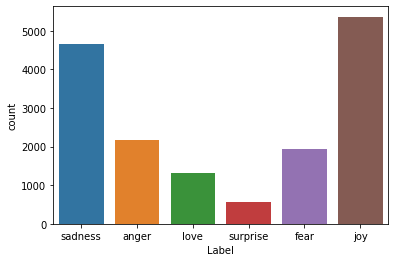

In [6]:
import seaborn as sns

sns.countplot(df['Label'])

<p style="font-size:1.3rem;font-family:arial;">We will drop the surprise column as it is highly imbalanced and we will handle the other features imbalance using text augmentation.</p>

In [7]:
df=df[df['Label']!='surprise'];

In [8]:
df.Label.value_counts()

joy        5362
sadness    4666
anger      2159
fear       1937
love       1304
Name: Label, dtype: int64

<strong style="font-size:1.3rem;font-family:arial;"><em>First we will try to the handle the imbalance using downsampling.Losing data is considered to be sin in machine learning.But first we will train the model by downsampling then we will use text augmentation</em></strong>

In [9]:
joy=df[df['Label']=='joy'];
sadness=df[df['Label']=='sadness'];


In [10]:
anger=df[df['Label']=='anger'];
fear=df[df['Label']=='fear'];


In [11]:
joy=joy.sample(2500);
sadness=sadness.sample(2500)

In [12]:
len(sadness)

2500

In [13]:
sadness.head(4)

,Text,Label
3533,i feel inadequate in those moments as a momma,sadness
11603,i have a massive identity of my own and always...,sadness
1987,i feel depressed i feel like they would ve bee...,sadness
7785,i just feel really emotionally drained,sadness


In [14]:
df=pd.concat([joy,sadness,anger,fear])

<h3>Plotting the bar graph of Labels </h3>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Label', ylabel='count'>

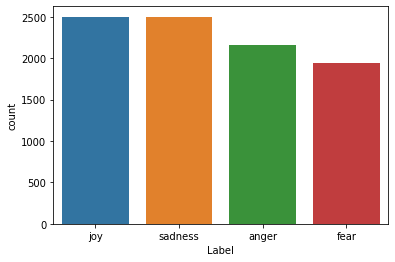

In [15]:
sns.countplot(df['Label'])

In [16]:
import spacy
from spacy import cli
cli.download("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 6.1 MB/s eta 0:00:00


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [17]:
nlp=spacy.load('en_core_web_md');

In [18]:
# Creating preprocess function to preprocess the data
import re

def preprocess(text):
 # Removing white spaces from our data
  text=re.sub(" +"," ",text);
 # Converting the text to lower case
  text=text.lower();
 # Word tokenization
  doc=nlp(text);
 # Removing stop words punctuations and doing Lemmatization
  filtered_words=[token.lemma_ for token in doc if not token.is_stop and not token.is_punct];
  
  return " ".join(filtered_words);
     

In [19]:
df['preprocessed']=df['Text'].apply(preprocess);

<strong style="font-size:1.3rem;font-family:cursive">Now as our text data is preprocessed we will now move on to EDA(Exploratory data analysis)</strong>

<strong style="font-size:1.2rem">We will now plot the word cloud of text containing particular emotion.</strong>

In [20]:
df.drop('Text',axis=1,inplace=True)

In [21]:
df.head(4)

,Label,preprocessed
11302,joy,feel smart need
13790,joy,want believe kid feel rich famous mansion wait
5828,joy,feel don t need describe gorgeous dominican re...
12034,joy,want feeling mutual club keen


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9096 entries, 11302 to 15983
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         9096 non-null   object
 1   preprocessed  9096 non-null   object
dtypes: object(2)
memory usage: 471.2+ KB


In [23]:
text_joy=df[df['Label']=='joy'];
text_sadness=df[df["Label"]=='sadness'];

In [24]:
text_anger=df[df['Label']=='anger'];
text_fear=df[df['Label']=='fear'];

In [25]:
joy_sentences=" ";
sentences=[sent for sent in text_joy['preprocessed']];
joy_sentences=joy_sentences.join(sentences)

In [26]:
anger_sentences=" ";
sentences=[sent for sent in text_anger['preprocessed']];

In [27]:
anger_sentences=anger_sentences.join(sentences);

fear_sentences=" ";

sentences=[sent for sent in text_fear['preprocessed']];

fear_sentences=fear_sentences.join(sentences);

sadness_sentences=" ";

sentences=[sent for sent in text_sadness['preprocessed']];

sadness_sentences=sadness_sentences.join(sentences);

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def plot_word_cloud(text): 
    wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='black').generate(text);
    plt.imshow(wordcloud,interpolation='bilinear');

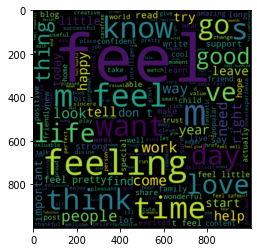

In [29]:
plot_word_cloud(joy_sentences);


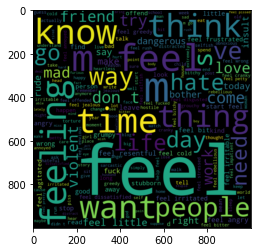

In [30]:
plot_word_cloud(anger_sentences)

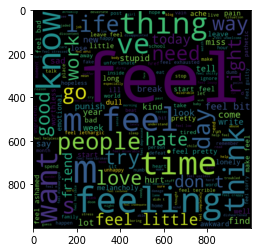

In [31]:
plot_word_cloud(sadness_sentences)

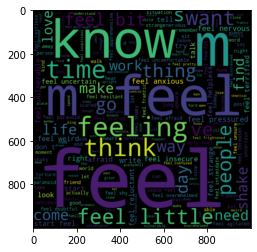

In [32]:
plot_word_cloud(fear_sentences)

In [33]:
features=df['preprocessed'];
labels=df['Label'];
labels=labels.map({'joy':0,'anger':1,'fear':2,'sadness':3});

In [34]:
# First we will use Tf-idf and multinomial naive bayes 
# Imports 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [35]:
# Train test splitting the the data.
X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.2,random_state=1000);



In [36]:
# Building the model pipeline 

multinomial_nb=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',MultinomialNB())
])

In [37]:
#Training the model
multinomial_nb.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('model', MultinomialNB())])

In [38]:
# Evaluating the model 
from sklearn.metrics import classification_report;
from sklearn.metrics import confusion_matrix;

y_pred_multinomial_nb=multinomial_nb.predict(X_test);
#Getting the classification report
cr_multinomial_nb=classification_report(Y_test,y_pred_multinomial_nb);

<strong><strong>

In [39]:
print(cr_multinomial_nb)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       492
           1       0.89      0.80      0.85       453
           2       0.94      0.74      0.83       404
           3       0.76      0.92      0.83       471

    accuracy                           0.85      1820
   macro avg       0.86      0.84      0.85      1820
weighted avg       0.86      0.85      0.85      1820



<strong style="font-size:1.27rem;font-family:arial;color:#360d0a;">Confusion Matrix (multinomial naive bayes)</strong>

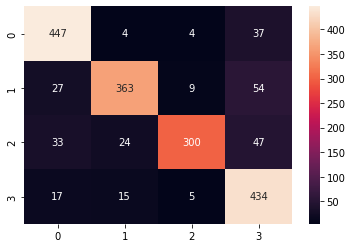

In [40]:
import seaborn as sns

cm_multinomial_nb=confusion_matrix(Y_test,y_pred_multinomial_nb);
sns.heatmap(cm_multinomial_nb,annot=True,fmt='d');

In [41]:
# Now we will use Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [42]:
params={
    'criterion':['gini','entropy'],
    'n_estimators':[25,5,100,40,50]
}

In [43]:
clf=RandomizedSearchCV(RandomForestClassifier(),params);
vectorizer=TfidfVectorizer();
x_train=vectorizer.fit_transform(X_train);
clf.fit(x_train,Y_train);

In [44]:
clf.best_params_

{'n_estimators': 100, 'criterion': 'gini'}

In [45]:
random_forest=Pipeline([('vectorizer',TfidfVectorizer()),('model',RandomForestClassifier(n_estimators=100,criterion='gini'))])

In [46]:
random_forest.fit(X_train,Y_train);

<strong style="font-size:1.4rem">Classification Report of Random Forest Classifier</strong>

In [47]:
# Evaluating the model

y_pred_random_forest=random_forest.predict(X_test);
cr_random_forest=classification_report(Y_test,y_pred_random_forest);
print(cr_random_forest)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       492
           1       0.91      0.89      0.90       453
           2       0.91      0.92      0.91       404
           3       0.91      0.86      0.88       471

    accuracy                           0.90      1820
   macro avg       0.90      0.90      0.90      1820
weighted avg       0.90      0.90      0.90      1820



In [48]:
from sklearn.metrics import accuracy_score

print(f"The accuracy of random forest classifier is {accuracy_score(Y_test,y_pred_random_forest)}")

The accuracy of random forest classifier is 0.8972527472527473


<strong style="font-size:1.4rem">Confusion matrix of Random Forest Classifier</strong>

<AxesSubplot:>

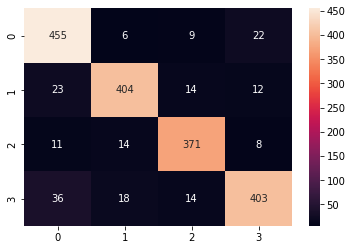

In [49]:
cm_random_forest=confusion_matrix(Y_test,y_pred_random_forest);
sns.heatmap(cm_random_forest,annot=True,fmt='d')

<strong style="font-size:1.4rem">Now Let's build SVM Classifier</strong>

In [50]:
from sklearn.svm import SVC
# dictionary of Hyperparameters for hyperparameter tuning
params={
    'C':[1,1.2,1.5],
    'kernel':['linear','poly','rbf'],
    'degree':[3,5,4,10]
}

In [51]:
# Hyperparameter tuning using randomizied Search cv
clf=RandomizedSearchCV(SVC(),params);
clf.fit(x_train,Y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [1, 1.2, 1.5],
                                        'degree': [3, 5, 4, 10],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [52]:
clf.best_params_

{'kernel': 'linear', 'degree': 4, 'C': 1.5}

In [53]:
svm=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',SVC(kernel='linear',C=1))
])

In [54]:
svm.fit(X_train,Y_train);


<strong style="font-size:1.6rem;font-family:arial;">Classification report of SVM</strong>

In [55]:
y_pred_svm=svm.predict(X_test);
cr_svm=classification_report(Y_test,y_pred_svm);
print(cr_svm)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       492
           1       0.90      0.89      0.89       453
           2       0.91      0.90      0.90       404
           3       0.89      0.87      0.88       471

    accuracy                           0.90      1820
   macro avg       0.90      0.90      0.90      1820
weighted avg       0.90      0.90      0.90      1820



<strong style="font-size:1.5rem;font-family:arial">Confusion Matrix of SVM</strong>

<AxesSubplot:>

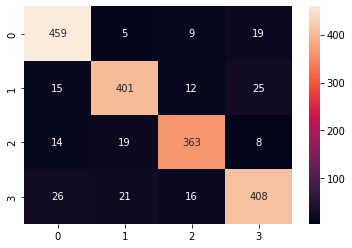

In [56]:
cm_svm=confusion_matrix(Y_test,y_pred_svm);
sns.heatmap(cm_svm,annot=True,fmt="d")

<div>
    
</div    